In [5]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing

In [7]:
max_features = 20000  # Consider the top 20,000 words
maxlen = 200  # Cut reviews after 200 words
embedding_dim = 128  # Dimensionality of word embeddings

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = models.Sequential([
    layers.Embedding(max_features, embedding_dim, input_length=maxlen),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\Schalk\Environments\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 398ms/step - accuracy: 0.6905 - loss: 0.5724 - val_accuracy: 0.8626 - val_loss: 0.3318
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 414ms/step - accuracy: 0.9119 - loss: 0.2299 - val_accuracy: 0.8676 - val_loss: 0.3174
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 399ms/step - accuracy: 0.9474 - loss: 0.1525 - val_accuracy: 0.8548 - val_loss: 0.3658
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 387ms/step - accuracy: 0.9658 - loss: 0.1041 - val_accuracy: 0.8660 - val_loss: 0.4160
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 395ms/step - accuracy: 0.9755 - loss: 0.0744 - val_accuracy: 0.8680 - val_loss: 0.5098
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 398ms/step - accuracy: 0.9876 - loss: 0.0425 - val_accuracy: 0.8620 - val_loss: 0.4908
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 389ms/step - accuracy: 0.9931 - loss: 0.0257 - val_accuracy: 0.8414 - val_loss: 0.5543
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 385ms/step - accuracy: 0.9761 - loss: 0

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8478 - loss: 0.6787
Test accuracy: 0.8466399908065796


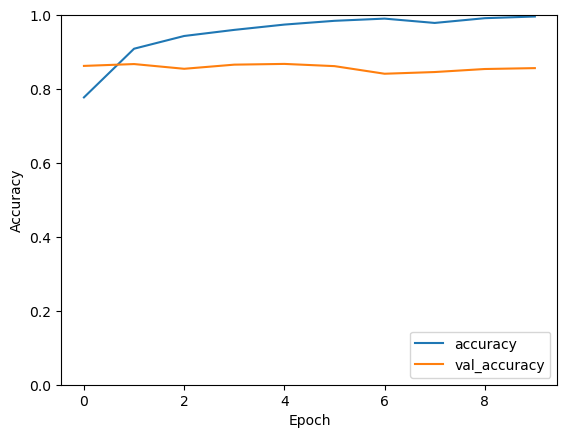

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [21]:
import numpy as np

# Preprocess the review text
review_text = "Interstellar is a cinematic triumph that masterfully blends science fiction with deep emotional storytelling. The stunning visuals, particularly the depictions of wormholes and black holes, are scientifically grounded and breathtaking, while Hans Zimmer's haunting score elevates the film’s grandeur. McConaughey's performance is deeply moving, capturing the essence of a father torn between duty and love."
tokenizer = preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([review_text])
review_sequence = tokenizer.texts_to_sequences([review_text])
padded_sequence = preprocessing.sequence.pad_sequences(review_sequence, maxlen=maxlen)

# Make prediction
prediction = model.predict(padded_sequence)

# Interpret the prediction
sentiment = "positive" if prediction > 0.5 else "negative"

print(f"The sentiment of the review '{review_text}' is {sentiment}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The sentiment of the review 'Interstellar is a cinematic triumph that masterfully blends science fiction with deep emotional storytelling. The stunning visuals, particularly the depictions of wormholes and black holes, are scientifically grounded and breathtaking, while Hans Zimmer's haunting score elevates the film’s grandeur. McConaughey's performance is deeply moving, capturing the essence of a father torn between duty and love.' is negative.
